# This notebook simulates the following circuit

It is part of a pulsetrain FM detector. In the actual detector an additional diode between ```B```and ```GND```is needed. As this notebook has only been built to understand the circuit, and the additional diode does not play a role to understand the hard parts of the circuits, it has been left out.

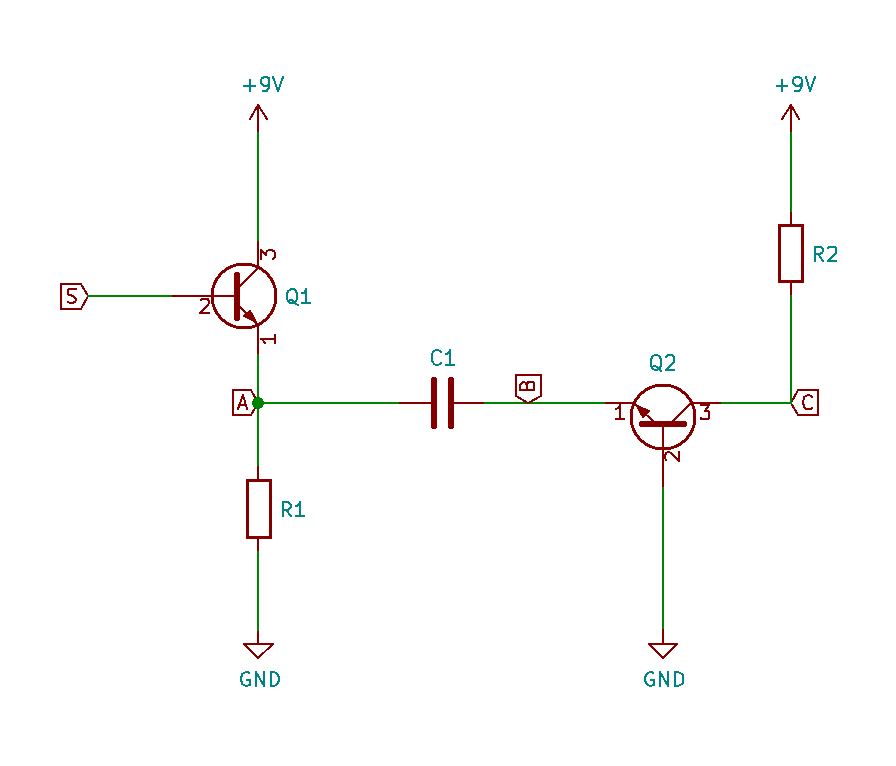

A complete pulsetrain FM detector is shown here

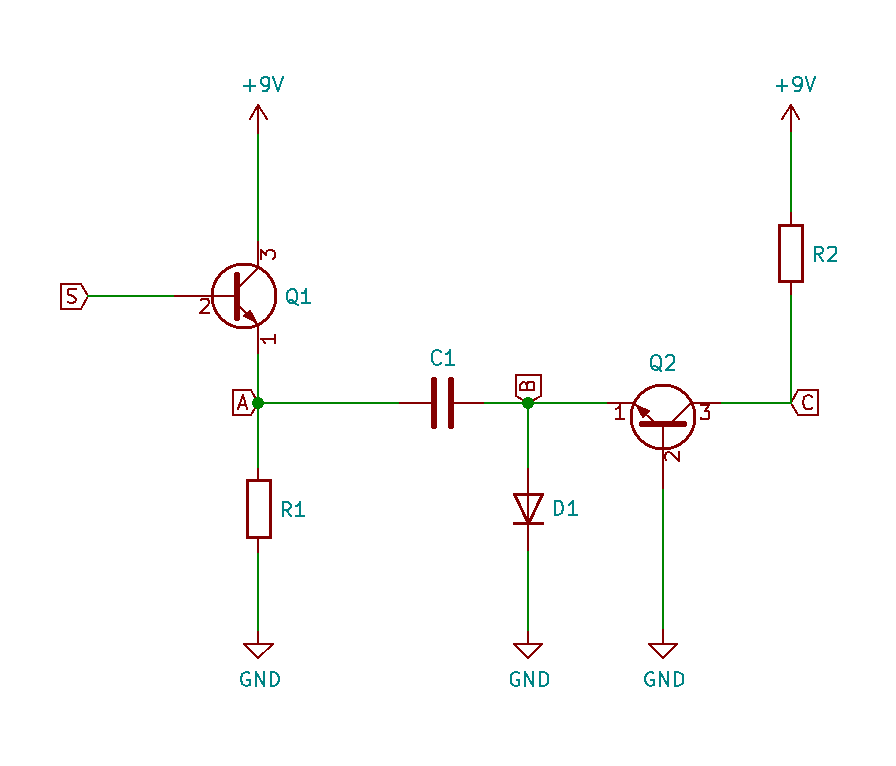

Note that the above circuit is **not** the circuit which is simulated in this notebook.

The circuit is described by
- Ebers Moll model transistor for $Q_2$
- a simple Shockley equation with BJT $\beta$ for $Q_1$
- Kirchoff current law for $Q_2$
- Kirchoff current law at $A$
- capacitor current-voltage relation for $C_1$
- Ohm's law over $R_1$ and $R_2$

These simple laws are put into
- one equation to calculate $V_C$ for any $V_B$ and $R_2$
- one differential equation which describes the voltage change over $C_1$ in time.

These two relations entirely describe the above circuit and will (also) let us calculate the most important aspect of this circuit, $V_C$ as a function of time.
<br><br>
More equations are implemented in this notebook to test the model, and to implement helper functions. They are not essential to the model however.

$$
\newcommand{\dd}[1]{\mathrm{d}#1}
$$

# Transistor equations

The **Ebers-Moll equations** for an NPN transistor are as follows. For the emitter current we have the following:

$$
\begin{equation}
I_E = I_{ES} \cdot \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right) - \alpha_R \cdot I_{CS} \cdot \left( \mathrm{e}^{ -\frac{V_C}{V_T} } -1 \right)
\end{equation}\\[1em]
$$

For the base current we have the following:

$$
\begin{equation}
I_B = \left( 1 - \alpha_F \right)
\cdot I_{ES} \cdot 
\left( \mathrm{e}^{ -\frac{V_B} {V_T} } -1 \right) + 
\left( 1 - \alpha_R \right) 
\cdot I_{CS} \cdot 
\left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
\end{equation}\\[1em]
$$

and for the collector current we use the following equation:

$$
\begin{equation}
I_C = \frac {V_{CC} - V_C} {R_C}
\end{equation}
$$

where $I_{ES} = \beta_F I_S$ and $I_{CS}=\beta_R I_S$, with $\beta_F=\frac{\alpha_F}{1-\alpha_F}$ and $\beta_R=\frac{\alpha_R}{1-\alpha_R}$

<br>

For transistor $Q_2$ write the **Kirchhoff's Current Law** as 

$$
\begin{equation}
I_{E,Q_2} - I_{B,Q_2} - I_{C,Q_2} = 0
\end{equation}
$$

Substitution gives

$$
\begin{equation}
I_{ES}  
\left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right)
- \alpha_R  I_{CS}  
\left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
- 
\left( 1- \alpha_F \right) 
 I_{ES} 
\left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right)
- 
\left( 1- \alpha_R \right)
 I_{CS}  
\left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
- 
\frac {V_{CC} - V_C}{R_C} = 0
\end{equation} \tag{6} \\[1em]
$$

which simplifies to

$$
\begin{equation}
\alpha_F I_{ES}  \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right)
-
I_{CS}  \left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
- 
\frac {V_{CC} - V_C}{R_C} = 0
\end{equation} \tag{7}
$$

<br>

With equation (7) $V_C$ can be solved (numerically) for any $V_B$ and $R_C$.

# Circuit equations

The **Kirchhoff's Current Law** at A tells us that

$$
\begin{equation}
i_{R_{1}}=i_{E,Q_1}+i_{E,Q_2}
\end{equation} \tag{8}
$$

where

$$
\begin{equation}
i_{E,Q_1}=I_{ES} \; \left( \mathrm{e}^{\frac {V_S-V_A} {V_T}}-1 \right) - \alpha_R \; I_{CS} \; \left( \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}} -1 \right)
\end{equation}
$$

and 

$$
\begin{equation}
i_{R_{1}}=\frac{V_{A}}{R_{1}}
\end{equation}
$$

The equation for $ i_{E,Q_2} $ from the Ebers-Moll transistor model is

$$
\begin{equation}
i_{E,Q_2}=I_{ES} \left(\mathrm{e}^{-\frac{V_B}{V_T}}-1\right)-\alpha_R I_{CS}  \left(\mathrm{e}^{-\frac{V_C}{V_T}}-1\right)
\end{equation} \tag{8a}
$$


Substitution of $i_{R_1}, i_{E_1}$ and $i_{E,Q_2}$ into $(8)$ gives


$$
\begin{equation}
\frac{V_{A}}{R_{1}}- I_{ES} \; \left( \mathrm{e}^{\frac {V_S-V_A} {V_T}}-1 \right) + \alpha_R \; I_{CS} \; \left( \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}} -1 \right)=I_{ES} \; \left(\mathrm{e}^{-\frac{V_{B}}{V_{T}}}-1\right)-\alpha_R \; I_{CS} \; \left(\mathrm{e}^{-\frac{V_C}{V_T}}-1\right)
\end{equation} \tag{9}\\[2em]
$$

This equation will let us calculate $V_A$ for any given $V_B$ and $V_S$. Remember that $V_C$ can be calculated from $V_B$ with eq. (7).
<br>


Differentiating $(9)$ with respect to time $\frac {\dd{}} {\dd{t}} \left \{ i_{R_1} = i_{E,Q_1} + i_{E,Q_2}\right \}$ gives

$$
\begin{equation}
\frac{1}{R_{1}} \frac{\mathrm{d}V_A}{\mathrm{d}t}
=
\frac{I_{ES}}{V_T} \; e^{\frac{V_S-V_A}{V_T}} \; \frac {\mathrm{d} \left (V_S-V_A \right )} {\mathrm{d}t}
-
\alpha_R \; I_{CS} \; \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}} \; \frac {1} {V_T} \; \frac {\mathrm{d} V_S} {\mathrm{d}t}
-
\frac {I_{ES}} {V_T} \; e^{- \frac {V_B} {V_T}} \; \frac {\mathrm{d}V_B} {\mathrm{d}t}
+ 
\frac {\alpha_R I_{CS}} {V_T} \; e^{- \frac {V_C} {V_T}} \; \frac {\mathrm{d}V_C} {\mathrm{d}t}
\end{equation} \tag{10}
$$

multiplying both sides with $R_1V_T$

$$
\begin{equation}
V_T \frac {\mathrm{d}V_A} {\mathrm{d}t}
= 
R_1 I_{ES} \; e^{ \frac {V_S-V_A} {V_T}} \; \frac {\mathrm{d}\left (V_S-V_A \right )} {\mathrm{d}t}
-
\alpha_R \; R_1 \; I_{CS} \; \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}} \; \frac {\mathrm{d} V_S} {\mathrm{d}t}
-
R_1 I_{ES} \; e^{- \frac {V_B} {V_T}} \; \frac {\mathrm{d}V_B} {\mathrm{d}t}
+
R_1 \alpha_R \; I_{CS} \; e^{- \frac {V_C} {V_T}} \; \frac {\mathrm{d}V_C} {\mathrm{d}t}
\end{equation} \tag{11}
$$

With

$$
\frac {\dd{V_C}} {\dd{t}} = \frac {\dd{V_C}} {\dd{V_B}} \; \frac {\dd{V_B}} {\dd{t}}
$$

and 

$$
\frac {\dd{\left( V_S - V_A \right)}} {\dd{t}} = \frac {\dd{V_S}} {\dd{t}} - \frac {\dd{V_A}} {\dd{t}}
$$


Now we define some variables


$$
X = \frac {\dd{V_A}} {\dd{t}}
$$

$$
Y = \frac {\dd{V_B}} {\dd{t}}
$$

$$
S_1 = R_1 I_{ES} \; e^{ \frac {V_S-V_A} {V_T}}
$$

$$
S_2 = \alpha_R \; R_1 \; I_{CS} \; \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}}
$$

$$
Q = \alpha_R R_1 I_{CS} \; e^{- \frac {V_C} {V_T}}
$$

$$
B = R_1 I_{ES} \; e^{- \frac {V_B} {V_T}}
$$


Now we express eq. (11) as

$$
\begin{equation}
V_T X
=
S_1 \left ( \frac {\mathrm{d}V_S} {\mathrm{d}t} - X \right )
-
S_2 \frac {\mathrm{d}V_S} {\mathrm{d}t}
-
R_1 \; I_{ES} \; Y \; e^{- \frac {V_B} {V_T}}
+
\alpha_R \; R_1 \; I_{CS} \; Y \; e^{- \frac {V_C} {V_T}} \; \frac {\mathrm{d}V_C} {\mathrm{d}V_B}
\end{equation} \tag{12}
$$

$$
\begin{equation}
V_T X 
=
S_1 \left ( \frac {\mathrm{d}V_S} {\mathrm{d}t} - X \right )
-
S_2 \frac {\mathrm{d}V_S} {\mathrm{d}t}
+
Y \left( Q \frac {\mathrm{d}V_C} {\mathrm{d}V_B} - B \right )
\end{equation} \tag{13}
$$

With the capacitor charge equation

$$
\begin{equation}
i_{E,Q_2} = C_1 \frac {\dd{V_{C_1}}} {\dd{t}} 
= C_1 \frac {\dd{\left(V_B-V_A} \right )} {\dd{t}}
= C_1 \left( \frac {\dd{V_B}} {\dd{t}} - \frac {\dd{V_A}} {\dd{t}} \right )
= C \left (Y-X \right )
\end{equation} \tag{14}
$$

So

$$
\begin{equation}
X = Y - \frac {i_{E,Q_2}} {C_1}
\end{equation} \tag{15}
$$

Substitute (15) into (13)

$$
\begin{equation}
V_T \left (Y - \frac {i_{E,Q_2}} {C_1} \right )
\; = \;
S_1 \left ( \frac {\mathrm{d}V_S} {\mathrm{d}t} - \left ( Y- \frac {i_{E,Q_2}} {C_1} \right ) \right )
-
S_2 \frac {\mathrm{d}V_S} {\mathrm{d}t}
+
Y \left (Q \frac {\mathrm{d}V_C} {\mathrm{d}V_B} - B  \right )
\end{equation}
$$

From this, extract $Y$

$$
{
\begin{equation}
\frac {\mathrm{d}V_B} {\mathrm{d}t} =
\frac
{i_{E,Q_2} \left ( S_1+V_T \right ) + (S_1-S_2) \; C_1 \; \frac {\mathrm{d}V_S} {\mathrm{d}t}}
{C_1 \left (S_1 + V_T + B - Q \frac {\mathrm{d}V_C} {\mathrm{d}V_B} \right )}
\end{equation} \tag{16}
}
$$



with $i_{E,Q_2}$ from equation (8a).


Equation (16) describes $\begin{equation} \frac {\dd{V_B}}{\dd{t}} \end{equation} 
$ in terms of $V_A$, $V_B$ and $V_C$ where $V_B$ is the only independent variable. $V_C$ can be calculated from $V_B$ using equation (7). $V_A$ can be calculated from $V_B$ using equation (9). Solving $\begin{equation} \frac {\dd{V_B}}{\dd{t}} \end{equation} $ solves the entire circuit.


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from scipy.misc import derivative
from scipy.integrate import odeint, solve_ivp
from scipy.special import lambertw
import scipy.signal as sig

In [3]:
# customizations

# change default size for plots
plt.rcParams['figure.figsize'] = [15, 7]

# change fontsize
# see https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

plt.rcParams.update({'font.size': 15})

# Pulse Train model parameters

In [4]:
circuit = { \
         # initial capacitor voltage
         'VB0': 1, \

         # Supply voltage
         'VCC': 9, \

         # Capacitor capacitance
         'C': 220e-12, \

         # resistor values
         'R1': 150, \
         'R2': 3300, \
     }

_START = 0
_END = 0.3e-6
_N = 1000

simulation = { \
              # time
              'START': _START, \
              'END': _END, \

              # number of sample points
              'N': _N, \

              # time_step (in seconds)
              'time_step': (_END - _START) / _N, \
              
              # statistics
              'pt_model_calls': 0, \
              'pt_samples': [], \

              'MIN_Y_GUESS': -1e2, \
              'MAX_Y_GUESS': 1e2, \

              # The next values define a range of base-emitter
              # voltages for which the BJT characteristics will
              # be calculated (mainly the collector voltage and
              # transistor current).
              
              # take care that the minimum and maximum values for
              # VB must include all possible values for VB, see
              # signal['V0'] and circuit['VB0'].
              'MIN_VB': -1, \
              'MAX_VB': 1, \
              'NVB': 10000, \
      
             }

# take note that 𝛼=𝛽/(1+𝛽), forward as well as backward
_BETA_F = 100
_BETA_R = 1

bjt = { \
       'Is': 1e-16, \
#       'Vt': 30.419e-3, \
       'Vt': 26e-3, \
       'Beta': _BETA_F, \
       'MAX_DIODE_DROP': 1, \
       'af': _BETA_F / (1 + _BETA_F), \
       'ar': _BETA_R / (1 + _BETA_R), \
      }

signal = { \
           'V0': 8, \
           'T1': 0.1e-6, \
          }

fast = False

In [5]:
# colors to be used in the plots

color_vb = '#ff7f0e'
color_va = 'tab:red'
color_vc = 'tab:blue'
color_vs = 'tab:brown'

color_iR1 = 'tab:blue'
color_iQ1 = 'tab:cyan'
color_iemitter = 'tab:red'
color_icollector = '#ff7f0e'
color_ibase = 'tab:green'

# Input signal

In [6]:
# defines the input signal at the base of ths initial follower

# input: time in seconds
# output: voltage in volts

def input_signal(t, _signal):
    v0 = _signal['V0']
    t1 = _signal['T1']
    if t > t1:
        s = 0
    else:
        s = v0 * (1 - t / t1)
    return s

In [7]:
# Returns the derivative with respect to time of the input signal

def dVsdt(t, _signal):
    v0 = _signal['V0']
    t1 = _signal['T1']
    if t > t1:
        s2 = 0
    else:
        s2 = -v0 / t1
    return s2

## Calculate $V_A$
Function `solve_va` calculates $V_A$ using

$$
\begin{equation}
\frac{V_{A}}{R_{1}}-\beta \cdot I_S \cdot \mathrm{e}^{\frac{V_S-V_A}{V_T}}=I_{ES} \cdot \left(\mathrm{e}^{-\frac{V_{B}}{V_{T}}}-1\right)-\alpha_R \cdot I_{CS} \cdot \left(\mathrm{e}^{-\frac{V_C}{V_T}}-1\right)
\end{equation}
$$

In [8]:
def solve_va_em(ie, vs, _signal, _c, _q):
    
    def eqn_8(va):
        ic = Ies * np.expm1((vs - va) / vt)
        vcc = _c['VCC']
        ic = ic - ar * Ics * np.expm1((vs - vcc) / vt)
        zero = va / r1 - ic - ie
        return zero
    
    r1 = _c['R1']
    beta = _q['Beta']
    Is = _q['Is']
    vt = _q['Vt']
    Ies = ies(_q)
    Ics = ics(_q)
    ar = _q['ar']
    _bound = _signal['V0']
    va = brentq(eqn_8, -_bound, _bound)

    return va

## Differential equation
Function `pt_model` implements the differential equation

$$
{
\begin{equation}
\frac {\mathrm{d}V_B} {\mathrm{d}t} =
\frac
{i_{E,Q_2} \left ( S_1+V_T \right ) + (S_1-S_2) \; C_1 \; \frac {\mathrm{d}V_S} {\mathrm{d}t}}
{C_1 \left (S_1 + V_T + B - Q \frac {\mathrm{d}V_C} {\mathrm{d}V_B} \right )}
\end{equation}
}
$$

where

$$
S_1 = R_1 I_{ES} \; e^{ \frac {V_S-V_A} {V_T}}
$$

$$
S_2 = \alpha_R \; R_1 \; I_{CS} \; \mathrm{e}^{\frac {V_S-V_{CC}} {V_T}}
$$

$$
Q = \alpha_R R_1 I_{CS} \; e^{- \frac {V_C} {V_T}}
$$

$$
B = R_1 I_{ES} \; e^{- \frac {V_B} {V_T}}
$$



In [9]:
def pt_model(vb, t, _signal, _c, _s, _q):
    if not fast:
        _s['pt_model_calls'] += 1
        _s['pt_samples'] = _s['pt_samples'] + [t]

    vt = _q['Vt']
    Is = _q['Is']
    vt = _q['Vt']
    Ies = ies(_q)
    Ics = ics(_q)
    ar = _q['ar']
    vcc = _c['VCC']
    r1 = _c['R1']
    c = _c['C']
    
    vc = vc_vb(vb)[0]
    q = ar * Ics * np.exp(-vc/vt)
    b = Ies * np.exp(-vb/vt)
    ie = b - Ies - q + ar * Ics
    vs = input_signal(t, _signal)
    va = solve_va_em(ie, vs, _signal, _c, _q)
    s = Ies * np.exp((vs-va)/vt)
    s2 = ar * Ics * np.exp((vs-vcc)/vt)
    
    dvcdvb = dVcdVb(vb)
    dvsdt = dVsdt(t, _signal)

    nom = ie * (r1 * s + vt) + r1 * (s - s2) * c * dvsdt
    den = c * (vt + r1 * (s + b - q * dvcdvb))

    y = nom / den
    
    return y

## Describe the BJT model

In [10]:
def ies(_q):
    Is = _q['Is']
    alpha_f = _q['af']
    beta_f = alpha_f / (1 - alpha_f)
    return beta_f * Is

In [11]:
def ics(_q):
    Is = _q['Is']
    alpha_r = _q['ar']
    beta_r = alpha_r / (1 - alpha_r)
    return  beta_r * Is

In [12]:
def shockley(v, _q):
    return _q['Is'] * np.expm1(v/_q['Vt'])

In [13]:
def exponent(v, _q):
    return np.expm1(v/_q['Vt'])

## Calculation of $V_C$ for any $V_B$
Functions `kcl_Q2` and `solve_vc`  solve $V_C$ for any $V_B$ using the equation 

<br>

$$
\alpha_F \cdot I_{ES} \cdot \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right)
-
I_{CS} \cdot \left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
- 
\frac {V_{CC} - V_C}{R_C} = 0
\\[1em]
$$

Basically this is the equation which says that the current through $R_C$ is equal to the current which flows through the transistor.

In [14]:
def kcl_Q2(vc, vb, _c, _q):
    e = exponent(-vb, _q)
    c = exponent(-vc, _q)
    Ies = ies(_q)
    Ics = ics(_q)
    ar = _q['ar']
    af = _q['af']
    vcc = _c['VCC']
    r2 = _c['R2']
    zero = af * Ies * e - Ics * c - (vcc - vc) / r2
    return zero

In [15]:
# This solves the collector voltage for a given base voltage (with fixed R2).
def solve_vc(vb, _c, _q):
    vcc = _c['VCC']
    try:
        vc = brentq(kcl_Q2, -vcc, vcc, args=(vb, _c, _q))
    except:
        vc = vcc
    return vc

# Calculation of $V_C$ for any $V_B$ using Lambert W function

In [16]:
from mpmath import mp

# This solves the collector voltage for a given base voltage (with fixed R2).
# This function uses the Lambert W function
#
# It uses the mpmath module as numpy does not provide sufficient
# precision to handle the large numbers involved. The function returns
# a simple Python float.
def solve_vc_w(vb, _c, _q):
    memprec = mp.prec
    try:
        mp.prec = 100
        vcc = _c['VCC']
        rc = _c['R2']
        af = _q['af']
        ar = _q['ar']
        _ics = ics(_q)
        _ies = ies(_q)
        vt = _q['Vt']
        z = vcc / rc
        p = af * _ies * mp.expm1(-vb/vt)
        a = p + _ics - z
        vc = vt * mp.lambertw(rc*_ics/vt * mp.exp(a*rc/vt)) - a*rc
    except:
        mp.prec = memprec
    return float(vc)

def test(vb, vc, _c, _q):
    vcc = _c['VCC']
    rc = _c['R2']
    af = _q['af']
    _ics = ics(_q)
    _ies = ies(_q)
    vt = _q['Vt']
    t = af*_ies*np.expm1(-vb/vt) - _ics*mp.expm1(-vc/vt) - (vcc - vc)/rc
    return t

if False:
    _q = -0.3543
    _q = -0.355
    _q = -1.0
    
    print('solve_vc')
    one = solve_vc(_q, circuit, bjt)
    print(one)
    print('test = ', test(_q, one, circuit, bjt))
    print()

    print('solve_vc_w')
    two = solve_vc_w(_q, circuit, bjt)
    print(two)
    print('test = ', test(_q, two, circuit, bjt))
    print()

    print('solve_vc_w2')
    three = solve_vc_w2(_q, circuit, bjt)
    print(three)
    print('test = ', test(_q, three, circuit, bjt))
    print()
    

# Calculate $V_B$ for any value of $C_1$ and $\frac {\dd{V_S}} {\dd{t}}$
## Influence of the input signal falltime and value of $C_1$ on $V_B$

<br>
The strategy employed is to solve $i_{Q_2} = C_1 \frac {\dd{V_{C_1}}} {\dd{t}}$. 
<br><br>
If we assume that $V_B$ is constant, we know that 
<br>
<br>
$$\frac {\dd{V_{C_1}}} {\dd{t}} = \frac {\dd{ \left( V_B-V_A \right ) }} {\dd{t}} = - \frac {\dd{V_A}} {\dd{t}} = - \frac {\dd{V_S}} {\dd{t}}$$
<br>
Substitute:
$$i_{Q_2} + C_1 \cdot \frac {\dd{V_S}} {\dd{t}} = 0$$
<br><br>
$i_{Q_2}$ can be solved from $V_B$ and $V_C$ with the Ebers-Moll model. 
<br><br>
$$
\begin{equation}
i_{Q_2} = I_{ES} \cdot \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right) - \alpha_R \cdot I_{CS} \cdot \left( \mathrm{e}^{ -\frac{V_C}{V_T} } -1 \right)
\end{equation}\\[1em]
$$
<br><br>
For this we need $V_C$, which can be calculated from 

$$
\alpha_F \cdot I_{ES} \cdot \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right)
-
I_{CS} \cdot \left( \mathrm{e}^{-\frac{V_C}{V_T}} -1 \right)
- 
\frac {V_{CC} - V_C}{R_C} = 0
\\[1em]
$$
<br>
<br>
$$V_C=V_T \cdot W_0 \left ( \frac {R_C I_{CS}} {V_T} e^{\frac {AR_C} {V_T}} \right ) - AR_C$$
<br><br>
where 
$$A=\alpha_FI_{ES}\left(e^{-\frac{V_B}{V_T}}-1\right)+I_{CS}-\frac{V_{CC}}{R_C}$$
<br><br>
and $W_0$ the Lambert W function (see [Wikipedia Lambert W function](https://en.wikipedia.org/wiki/Lambert_W_function)).

In [17]:
# calculates Vb for a given C1 and dVs/dt
# implemented as it is it does not depend on previously calculated values.

@np.vectorize
def solve_vb(_c1, dVs_dt, _q):
    Ies = ies(_q)
    Ics = ics(_q)
    ar = _q['ar']
    vt = _q['Vt']

    def iQ2(vb, vc):
        e = np.expm1(-vb/vt)
        c = np.expm1(-vc/vt)
        i = Ies * e - ar * Ics * c
        return i
    
    def eqn(_vb):
        vc = solve_vc_w(_vb, circuit, _q)
        i = iQ2(_vb, vc)
        zero = i + _c1*dVs_dt
        return zero
    
    _vb = brentq(eqn, -1.0, 0.1)
    return _vb

if False:
    c1 = np.linspace(10e-12, 500e-12, 100)
    dVs_dt = - signal['V0'] / signal['T1']
    _vb = np.array( [solve_vb(_c1, dVs_dt, bjt) for _c1 in c1] )
    plt.figure(figsize=[10,7])
    plt.plot(c1 / 1e-12,_vb)
    plt.grid()
    plt.title(f'$V_B$ (V)  for   dVs/dt={dVs_dt/1e06}V/µs')
    plt.xlabel('$C_1$ (pF)')
    plt.ylabel('$V_B$  (V)')
    _file = f'plots/Plot-VB dVsdt={dVs_dt/1e06}.jpg'
    plt.savefig(_file)
    

In [18]:
if False:
    c1 = np.linspace(10e-12, 500e-12, 50)
    dVs_dt = np.linspace(5, 1000, 50) * -1e6
    
    A, B = np.meshgrid(c1, dVs_dt)
    VB = solve_vb(A, B, bjt)
    
    fig, ax = plt.subplots(figsize=[10,7])
    CS = ax.contour(A * 1e12, B*1e-6, VB, 10)
    ax.clabel(CS, inline=True, fontsize=10);
    plt.xlabel('$C_1$   (pF)')
    plt.ylabel('$dVs\;/\;dt$   (V/µs)')
    plt.grid()
    plt.title('$V_B$ (V) as a function of $C_1$ and $dVs\;/\;dt$')
    
    t1 = signal['T1'] / 1e-6
    _file = 'plots/Plot-VB_C1DVSDT.jpg'
    plt.savefig(_file)
    plt.show()


## Ebers-Moll model for the BJT
Calculate the current $I_E$ for $Q_2$ as a function of $V_B$.

$$
\begin{equation}
I_E = I_{ES} \cdot \left( \mathrm{e}^{-\frac{V_B}{V_T}} -1 \right) - \alpha_R \cdot I_{CS} \cdot \left( \mathrm{e}^{ -\frac{V_C}{V_T} } -1 \right)
\end{equation}\\[1em]
$$

Note that in the above equation $V_C$ can be directly calculated from $V_B$ as described earlier.

In [19]:
# Calculates the emitter current from a give Vb
def current_from_vb(vb, _q):
    Ies = ies(_q)
    Ics = ics(_q)
    ar = _q['ar']
    e = exponent(-vb, _q)
    vc = vc_vb(vb)
    c = exponent(-vc, _q)
    i = Ies * e - ar * Ics * c
    return i

## Helper functions

In [20]:
# calculate Vb for a given iQ2

def vb_i(query):

    def find_nearest(array, value):
        idx = np.searchsorted(array, value, side="left")
        if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
            return idx-1
        else:
            return idx

    idx = find_nearest(np.flip(i), query)
    return v_base[idx]

if False:
    print(vb_i(17.6e-3))

# Calculate Pulse Train model over time

# ... PT model over time

## Initialize all BJT arrays

In [21]:
# New

# This function will create voltage and current baselines and functions.
def calc_bjt(_c, _s, _q):
    # Create a emitter voltage series and corresponding collector voltage series
    global v_base, v_coll
    v_base = np.linspace(_s['MIN_VB'], _s['MAX_VB'], _s['NVB'])
    v_coll = np.array( [solve_vc(vb, _c, _q) for vb in v_base] )

    # Create a function from which can calculate the collector voltage
    # from ANY emitter voltage. The function will return an array-like, so
    # to get the actual value use [0].
    
    # This may not be true!
    global vc_vb
    vc_vb = interp1d(v_base, v_coll, kind='cubic')

    # Create a function to calculate dVc/dVb for any emitter voltage
    # Must be done numerically because Vc cannot be derived analytically either.
    global dVcdVb
    grad = np.gradient(v_coll, v_base)
    dVcdVb = interp1d(v_base, grad, kind='cubic', fill_value='extrapolate')
    
    # Create a series with the current for any emitter voltage v_base
    global i
    i = np.array( [current_from_vb(v, _q) for v in v_base])        
    
    # Create a function to calculate the emitter current from
    # ANY emitter voltage.
    global i_vb
    i_vb = interp1d(v_base, i, kind='cubic', fill_value='extrapolate')

In [22]:
# This is an essential part of the notebook
def calc_initial_voltages(_circuit, _signal):
    va0 = _signal['V0']
    vb0 = _circuit['VB0']
    return va0, vb0

## Calculate the time at which $Q_1$ gets into cutoff
The algorithm which is used is to find the last local maximum in $\frac{\dd{^2\left(I_{Q_1}\right)}}{\dd{t^2}}$ before $V_S<V_A$.

In [23]:
# Calculates the cutoff moment of Q1
# Returns the time at which this occurs, the base and emitter voltages Vs and Va at that moment.

def calc_cutoff(iQ1=None):
    if iQ1 is None:
        iQ1 = np.array([bjt['Beta'] * shockley(_vs-_va, bjt) for (_vs, _va) in zip(vs, va)])
#    iQ1 = shockley(vs-va, bjt)

    # Find the first time at which Vs is lower than Va
    # This is surely after Q1 has got into cutoff
    
    # First find all the times Vs-Va changes sign
    _x, = np.where(np.diff(np.signbit(vs-va)))
    # see https://stackoverflow.com/questions/3843017/efficiently-detect-sign-changes-in-python
    
    # Then find the first occurence of sign change 
    _x = _x[0]

    diQ1dt = np.gradient(iQ1[0:_x])
    diQ1dt2 = np.gradient(diQ1dt)
    
    # Find the latest maximum t<_x in diQ1/dt2. 
    # That is the moment Q1 gets into cutoff
    _maxima, = sig.argrelextrema(diQ1dt2, np.greater)
    try:
        _last = _maxima[-1]
        _time_last_maximum = t[_maxima[-1]]
        return _time_last_maximum, vs[_last], va[_last]
    except Exception:
        return 0, vs[0], va[0]

## Calculate the time at which $Q_2$ gets out of saturation
Find the time of the highest peak of $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$ after the first trough in $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$ after $V_C<0$ and $\frac{\dd{\left(I_{Q_{2,b}}\right)}}{\dd{t}}<0$. These two conditions are to limit the eligible search area for the time at which $Q_@$ gets out of saturation. $V_C$ must be $<0$ because when $>0$ it can never be in saturation. 

The first peak for $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$ represent the sudden rise in base current. $Q_2$ enters saturation now. After that the base current slowly decreases, with $\frac{\dd{\left(I_{Q_{2,b}}\right)}}{\dd{t}}<0$. After the first peak for $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$ must follow a trough, because when $Q_2$ leaves saturation the base current will stop dropping, and as such cause a peak in $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$ again. This is the largest peak since the inituial trough in $\frac{\dd{^2\left(I_{Q_{2,b}}\right)}}{\dd{t^2}}$.
<br>
Other methods to detect the end of saturation have proven unreliable. But another method (not tested yet) may simply be a test for when the sign of $V_C$ changes from negative to positive.


In [24]:
def find_peaks(a):
    # create a copy of a bordered with values which are less than any value  of a
    b = np.zeros(a.size+2)
    b[1:-1] = a
    min = np.amin(a)
    b[0], b[-1] = min-1, min-1

    # now find internal and border local maxima and correct for different size of a and b
    m = sig.find_peaks(b)[0] - 1
    return m

In [25]:
def find_troughs(a):
    return find_peaks(-a)

In [26]:
# Calculates the time at which Q2 gets out of saturation
# Note that Q2 might not even get into saturation ever. In that case 0 will be returned
_test = False

def calc_saturation():
    try:
        iBJT = np.array( [i_vb(v) for v in vb] )
        vColl = np.array( [vc_vb(v) for v in vb] )
        iR2 = (circuit['VCC'] - vColl) / circuit['R2']
        iBase = iBJT - iR2

        di = np.gradient(iBase)
        di2 = np.gradient(di)

        # Get the indices of eligible time
        f = np.where((di<0) & (vc<0))[0]  
        _X = 0         # number of extra samples (dependent on how np.gradient works (2x))
        if f.size <= _X:
            return 0, 0, 0
        _L = f[-1]     # latest time

        s = di2[f[0]:_L+1+_X]
        troughs = find_troughs(s)
        first_trough = troughs[0]
        peak = np.argmax(s[first_trough+1:]) + first_trough + 1

        index = f[0] + peak
        saturation_out = t[index]

        return saturation_out, f[0], f[-1]
    except:
        return 0, 0, 0


if _test:
    calc_saturation()

In [27]:
def calc_Q2_enters_saturation():
    # Get the time of the first sharp increase in dIbase/dt.
    # This is the time at which 
    # Get th time of the first peak in d2Ibase/dt2 where Vc<0
    # 
    iBJT = np.array( [i_vb(v) for v in vb] )
    vColl = np.array( [vc_vb(v) for v in vb] )
    iR2 = (circuit['VCC'] - vColl) / circuit['R2']
    iBase = iBJT - iR2

    di = np.gradient(iBase)
    di2 = np.gradient(di)

    # Get the indices of eligible time
    f = np.where(vc<0)[0]  
    _X = 0         # number of extra samples (dependent on how np.gradient works (2x))
    if f.size <= _X:
        return 0, 0, 0
    _L = f[-1]     # latest time

    s = di2[f[0]:_L+1+_X]
    peak = np.argmax(s[1:]) + 1

    index = f[0] + peak
    saturation_in = t[index]

    return saturation_in, f[0], f[-1]

if False:
    print(calc_Q2_enters_saturation()[0] / 1e-6)

# Calculates the circuit over time

In [28]:
def calc_circuit(_signal, _c, _s, _q):
    global va0, vb0, va, vb, vc, vs, t, i_t, cutoff, saturation

    va0, vb0 = calc_initial_voltages(_c, _signal)
    
#    print(f'Va(0)={va0}')
#    print(f'Vb(0)={vb0}')
          
    # setup a timeline
    t = np.linspace(_s['START'], _s['END'], _s['N'])

    _s['pt_model_calls'] = 0
    _s['pt_samples'] = []

    # Calculate the values for the voltage over diode D1
    vb = odeint(pt_model, vb0, t, args=(_signal, _c, _s, _q))[:,0]

    # Calculate input signal
    vs = np.array( [input_signal(_t, _signal) for _t in t])
    
    # Calculate collector voltage
    # note that the function returned by interp1d (which is vc_vb()) returns an array-like
    vc = np.array( [vc_vb(v) for v in vb] )
    
    # Calculate current in the circuit
    i_t = np.array( [i_vb(v) for v in vb])
    
    # Calculate the voltage over R1, Va.
    va = np.array( [solve_va_em(_ie, _vs, _signal, _c, _q) for (_ie, _vs) in zip(i_t, vs)] )
    
    cutoff,_,_ = calc_cutoff()
    saturation,_,_ = calc_saturation()

# Calculates the entire model
Calculates the BJT arrays, and the entire circuit model over time.

In [29]:
def calc_model(_signal, _c, _s, _q):
    calc_bjt(_c, _s, _q)
    calc_circuit(_signal, _c, _s, _q)

In [30]:
calc_bjt(circuit, simulation, bjt)

In [31]:
calc_circuit(signal, circuit, simulation, bjt)

# Sanity checks

## input signal

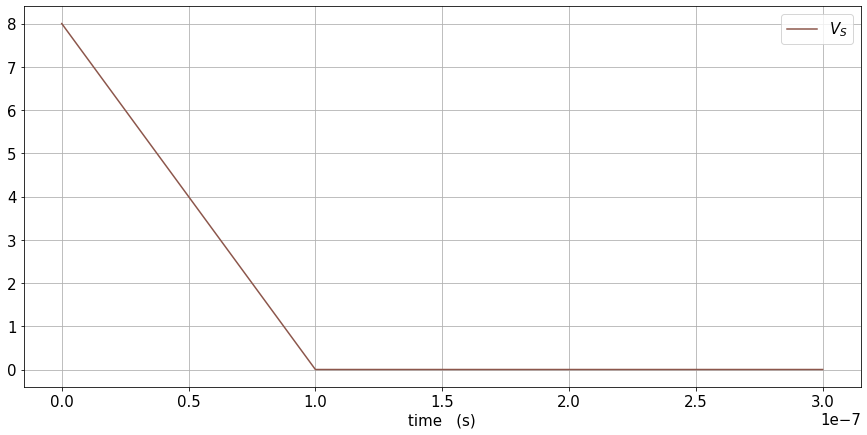

In [32]:
plt.plot(t, vs, color=color_vs, label='$V_S$')
plt.xlabel('time   (s)')
plt.grid(True);
plt.legend();

## input signal time derivative

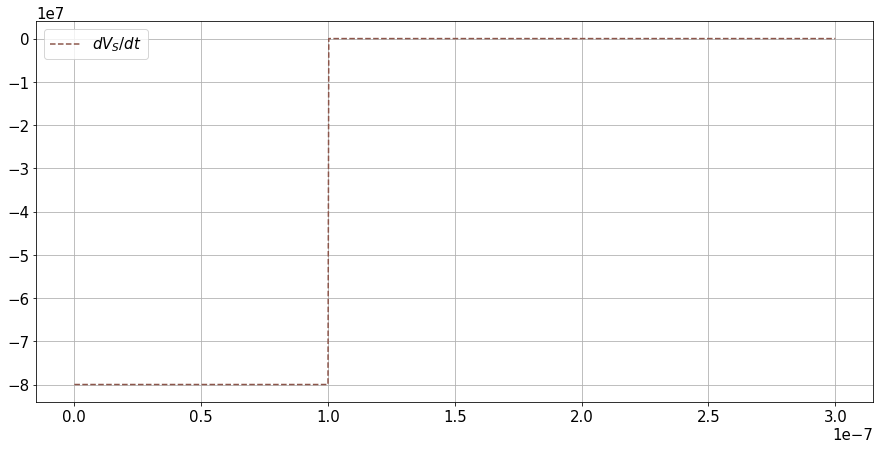

In [33]:
_d = np.array( [dVsdt(_t, signal) for _t in t] )
plt.plot(t, _d, '--', color=color_vs, label='$dV_S/dt$')
plt.grid(True)
plt.legend();

## Collector voltage vs. base-emitter voltage

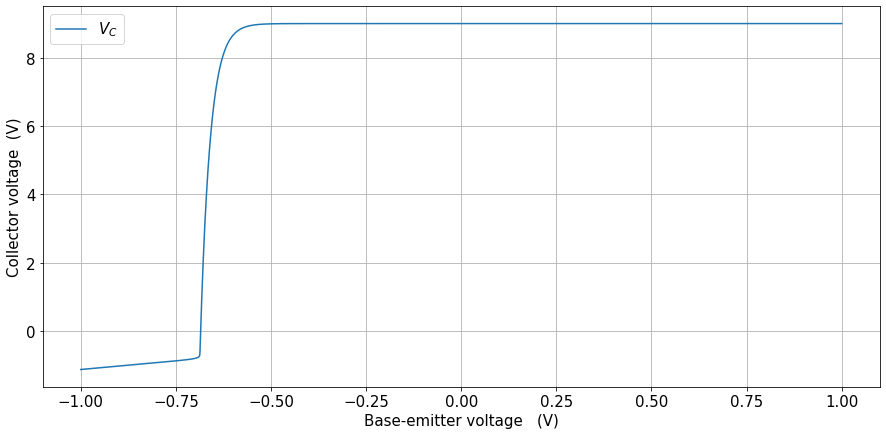

In [34]:
plt.plot(v_base, v_coll,color=color_vc, label='$V_C$')
plt.xlabel('Base-emitter voltage   (V)')
plt.ylabel('Collector voltage  (V)')
plt.grid(True)
plt.legend();

## Transistor current vs. base-emitter voltage

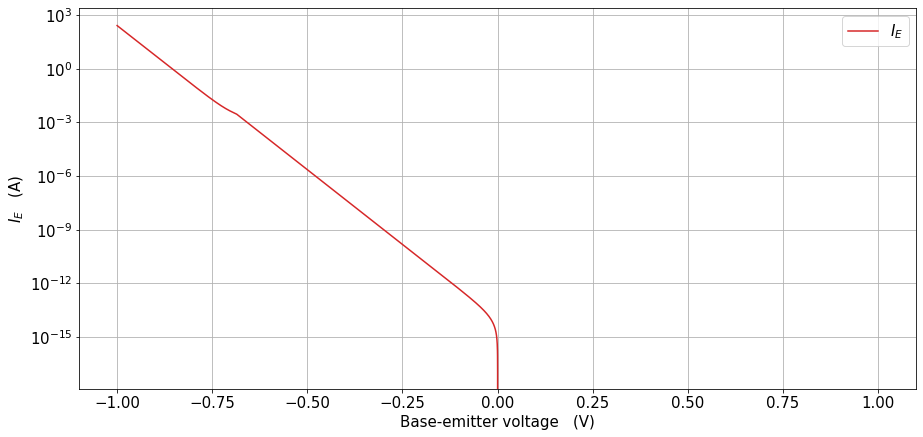

In [35]:
plt.plot(v_base, i, color=color_iemitter, label='$I_E$')
plt.xlabel('Base-emitter voltage   (V)')
plt.ylabel('$I_E$   (A)')
plt.yscale('log')
plt.grid(True)
plt.legend();

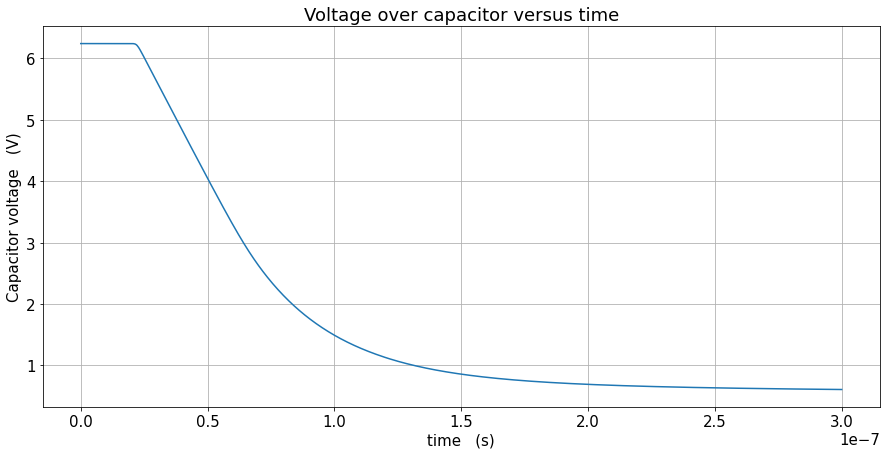

In [36]:
plt.title("Voltage over capacitor versus time")
plt.xlabel('time   (s)')
plt.ylabel('Capacitor voltage   (V)')
plt.plot(t, va-vb)
plt.grid(True)

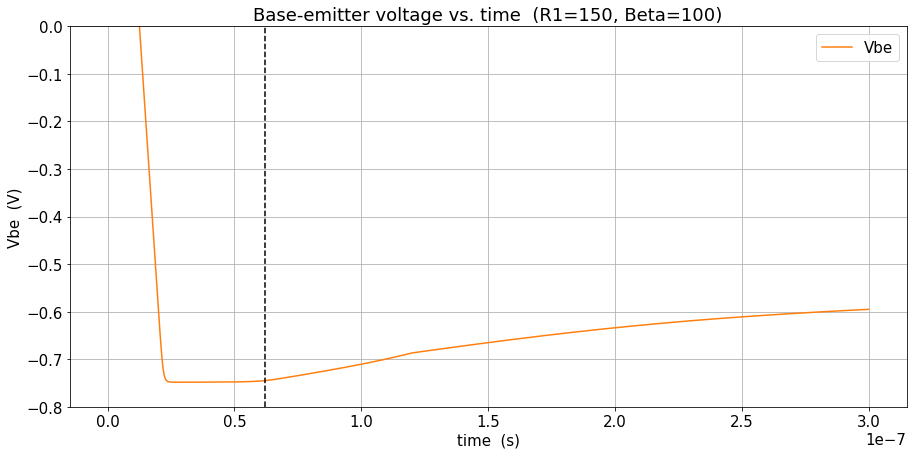

In [37]:
if True:
    _beta = bjt['Beta']
    _r1 = circuit['R1']

    plt.title(f'Base-emitter voltage vs. time  (R1={_r1}, Beta={_beta})')
    plt.plot(t, vb, color=color_vb, label='Vbe')
    plt.axvline(cutoff, c='k', ls='--')
    plt.axis(ymax=0,ymin=-0.8)
    plt.xlabel('time  (s)')
    plt.ylabel('Vbe  (V)')
    plt.grid(True)
    plt.legend();

# Voltage at emitter $Q_1$
Find out what causes the voltage at $Q_1$, a.k.a. A.

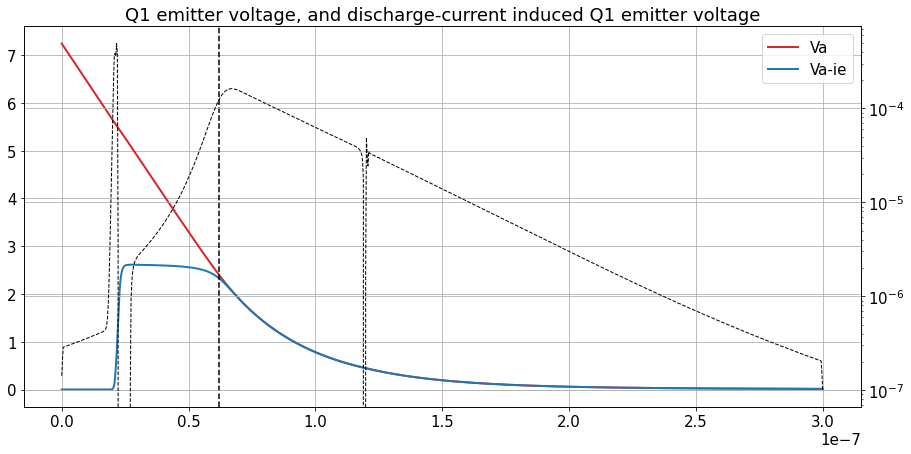

In [38]:
# Find out if the voltage at A is caused by residual voltage on the capacitor
# or caused by the Ie discharge current

# Calculate the voltage at A caused by the discharge current
_va_ie = i_t * circuit['R1']

_dvadt = np.gradient(va)
_dvadt2 = np.gradient(_dvadt)

fig, ax1 = plt.subplots()

plt.title('Q1 emitter voltage, and discharge-current induced Q1 emitter voltage')

ax1.plot(t, va, color=color_va, label='Va', linewidth=2)
ax1.plot(t, _va_ie, label='Va-ie', linewidth=2)
cutoff,_,_ = calc_cutoff()
ax1.axvline(cutoff, c='k', ls='--')
ax1.legend()
ax1.grid(True);

ax2 = ax1.twinx()
#ax2.plot(t,_dvadt, label='dVa/dt')
ax2.plot(t,_dvadt2, 'k--', linewidth=1)
ax2.grid(True)
ax2.set_yscale('log')
plt.show();


The above figure shows that after t=70ns discharging takes place at a slower rate than before.
<br>At t=70ns the rate of decrease of discharge is largest.
<br>

<br>This is related to Q1 getting into cutoff.

<br>

<br>



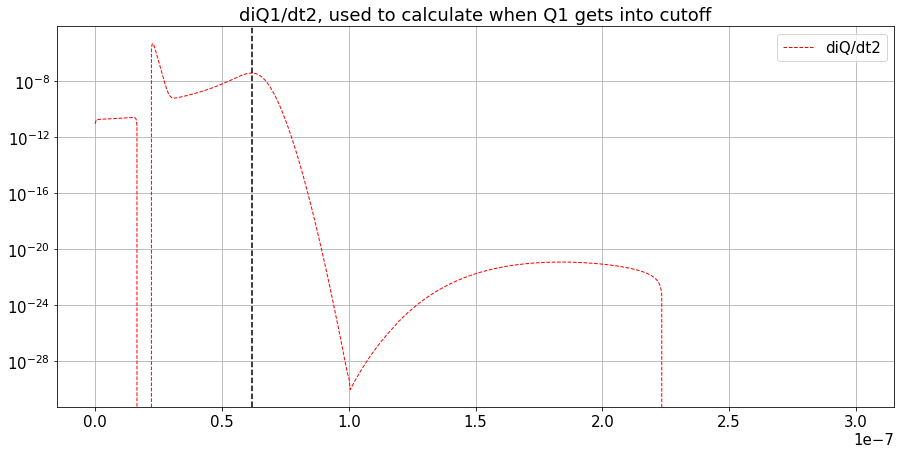

In [39]:
_iQ1 = shockley(vs-va, bjt)
_diQ = np.gradient(_iQ1)
_diQ2 = np.gradient(_diQ)
_min = np.argmin(_diQ2)
_max = np.argmax(_diQ2)

plt.title('diQ1/dt2, used to calculate when Q1 gets into cutoff')
plt.plot(t,_diQ2, 'r--', label='diQ/dt2', linewidth=1)
plt.axvline(cutoff, c='k', ls='--')
plt.yscale('log')
plt.legend()
plt.grid(True)

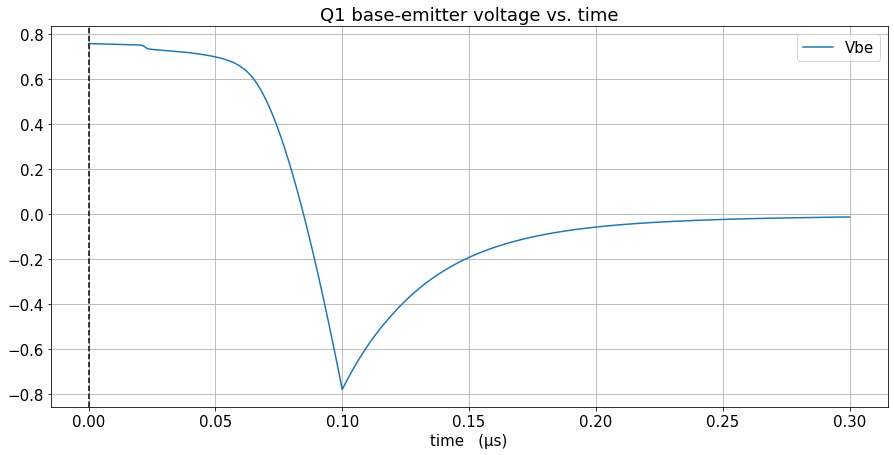

In [40]:
plt.title('Q1 base-emitter voltage vs. time')
plt.plot(t / 1e-6, vs-va, label='Vbe')
plt.axvline(cutoff, c='k', ls='--')
plt.grid(True)
plt.legend()
plt.xlabel('time   (µs)')
plt.show();


# Find the end of the saturation period of $Q_2$

1.1981981981981982e-07


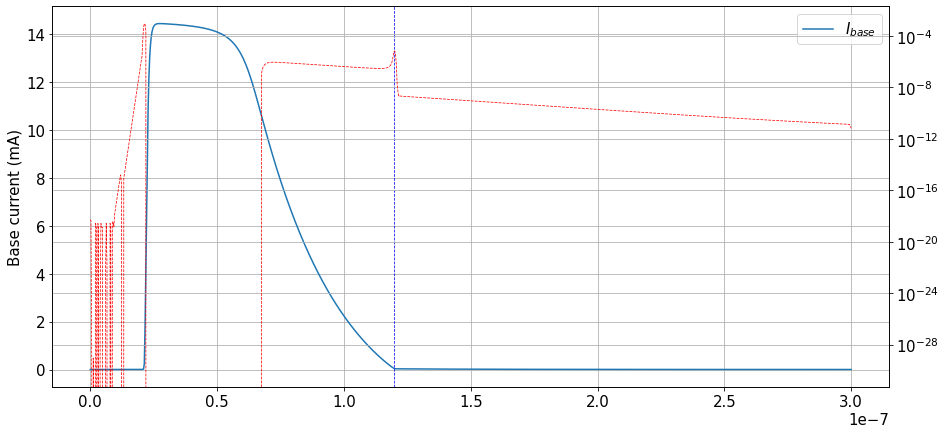

In [41]:
def test_saturation():
    _iBJT = np.array( [i_vb(v) for v in vb] )
    _coll = np.array( [vc_vb(v) for v in vb] )
    _iR2 = (circuit['VCC'] - _coll) / circuit['R2']
    _iBase = _iBJT - _iR2

    _di = np.gradient(_iBase)
    _di2 = np.gradient(_di)

    fig, ax1 = plt.subplots()

    ax1.plot(t, 1000 * _iBase, label=r'$I_{base}$')
#    ax1.plot(t, vc, label=r'$V_C$')
    ax1.axvline(saturation, c='b', ls='--', lw=0.75)
    ax1.legend()
#    ax1.set_yscale('log')
    ax1.grid()
    ax1.set_ylabel('Base current (mA)')

    # TODO check for di<0 in greater() and leave t>(something arbitrary)?
    
    ax2 = ax1.twinx()
    ax2.plot(t, _di2, 'r--', linewidth=0.75)
    ax2.set_yscale('log')
    ax2.grid()
    
    plt.show()

print(saturation)
test_saturation()

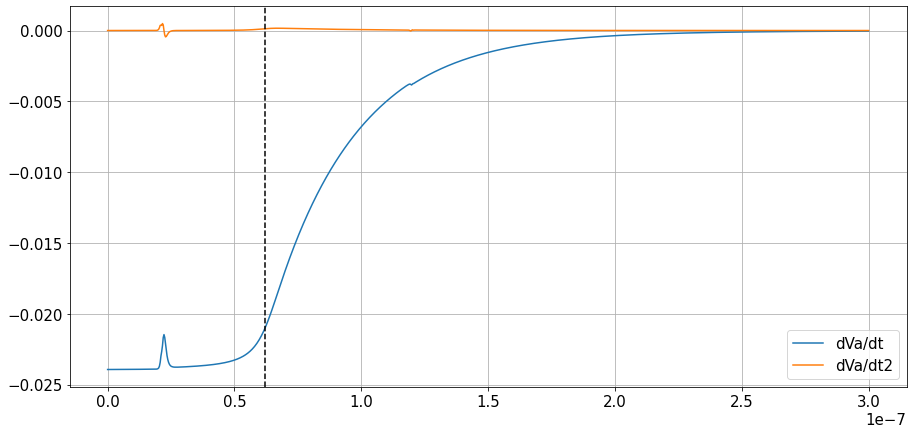

In [42]:
_dvadt = np.gradient(va)
_dvadt2 = np.gradient(_dvadt)
ax = plt.gca()
#ax.axes.yaxis.set_visible(False)
plt.plot(t,_dvadt, label='dVa/dt')
plt.plot(t,_dvadt2, label='dVa/dt2')
plt.axvline(cutoff, c='k', ls='--')
plt.legend()
plt.grid(True)
plt.show();

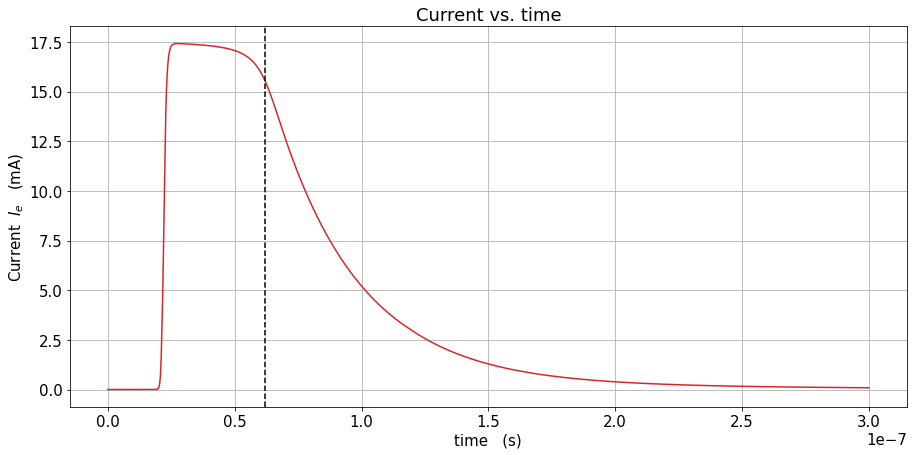

In [43]:
plt.title('Current vs. time')
plt.plot(t, i_t * 1000, color=color_iemitter, label='Ie')
plt.axvline(cutoff, c='k', ls='--')
plt.xlabel('time   (s)')
plt.ylabel('Current  $I_e$   (mA)')
plt.plot()
plt.grid(True)
plt.plot();

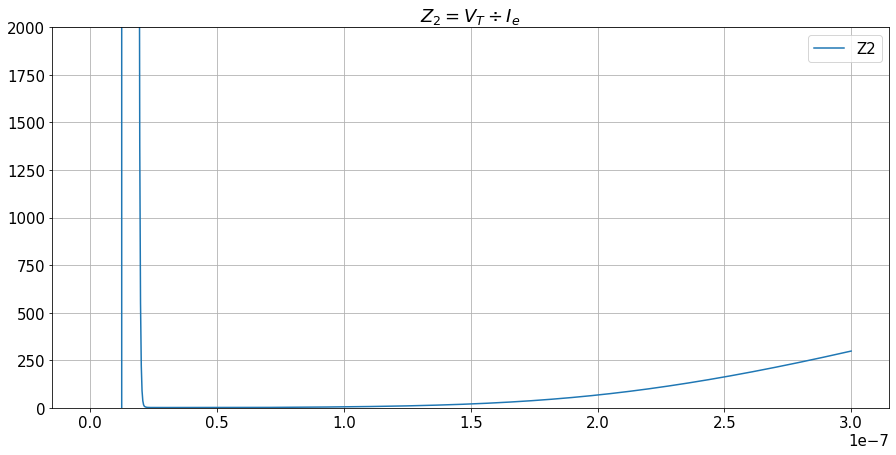

In [44]:
# Find out if Va and Vb behave according to the balance equation
# when we take Z2 = Vt / Ie

_z2 = bjt['Vt'] / i_t
plt.title('$Z_2=V_T\div I_e$')
plt.plot(t, _z2, label='Z2')
plt.ylim(0, 2000)
plt.legend()
plt.grid(True);

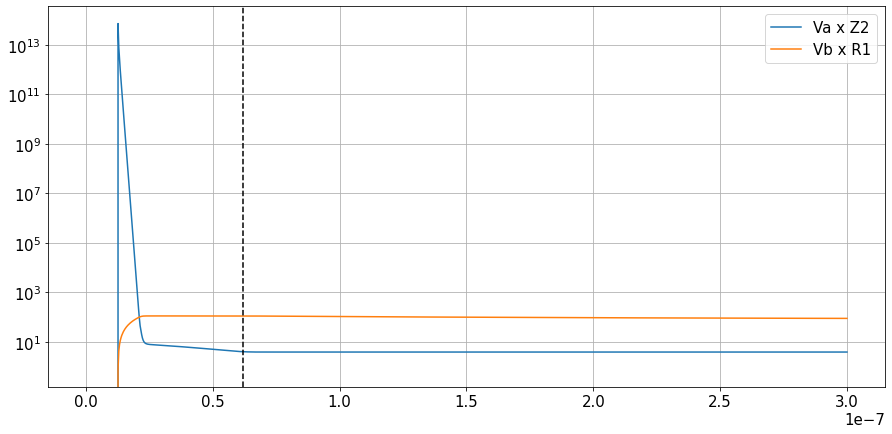

In [45]:
# Balance equation: Va * Z2 = Vb * R1, with Z2 = Vt / Ie

_z2 = bjt['Vt'] / i_t
plt.plot(t, va * _z2, label='Va x Z2')
plt.plot(t, -vb * circuit['R1'], label='Vb x R1')
plt.axvline(cutoff, c='k', ls='--')
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.plot();

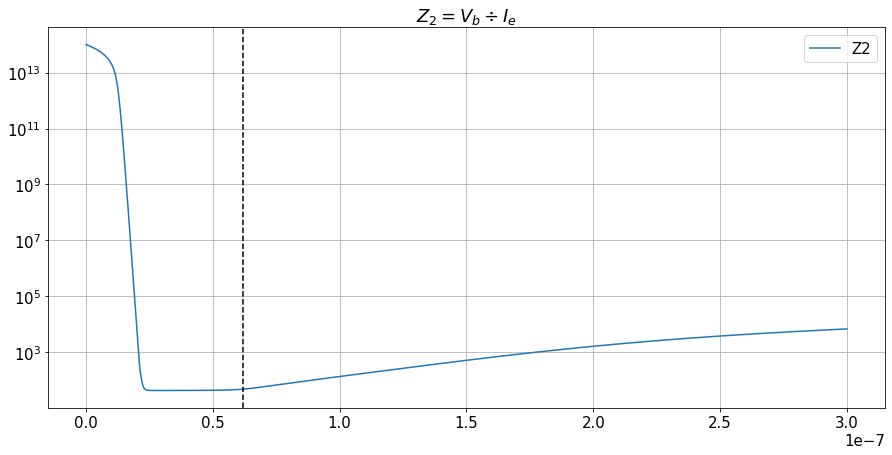

In [46]:
# Find out if Va and Vb behave according to the balance equation
# when we take Z2 = Vb / Ie

_z2 = -vb / i_t
plt.title('$Z_2=V_b\div I_e$')
plt.plot(t, _z2, label='Z2')
plt.axvline(cutoff, c='k', ls='--')
plt.yscale('log')
plt.legend()
plt.grid(True);

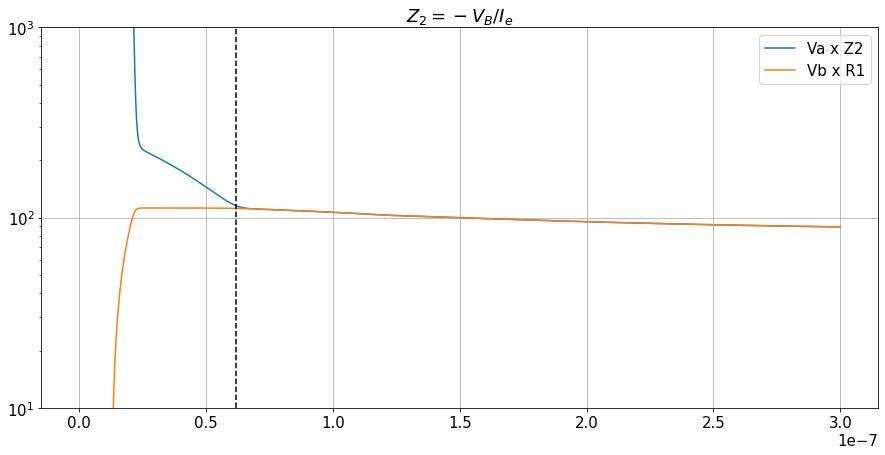

In [47]:
# Balance equation: Va * Z2 = Vb * R1, with Z2 = -Vb / Ie

_z2 = -vb / i_t
plt.title('$Z_2=-V_B / I_e$')
plt.plot(t, va * _z2, label='Va x Z2')
plt.plot(t, -vb * circuit['R1'], label='Vb x R1')
plt.axvline(cutoff, c='k', ls='--')
plt.grid(True)
plt.ylim(10,1000)
plt.legend()
plt.yscale('log')
plt.plot();

## $V_C$ dependency of $V_B$ vs. time
plot of $\frac {\dd{V_C}} {\dd{V_B}}$ vs. time.

<br>
Is this interesting?

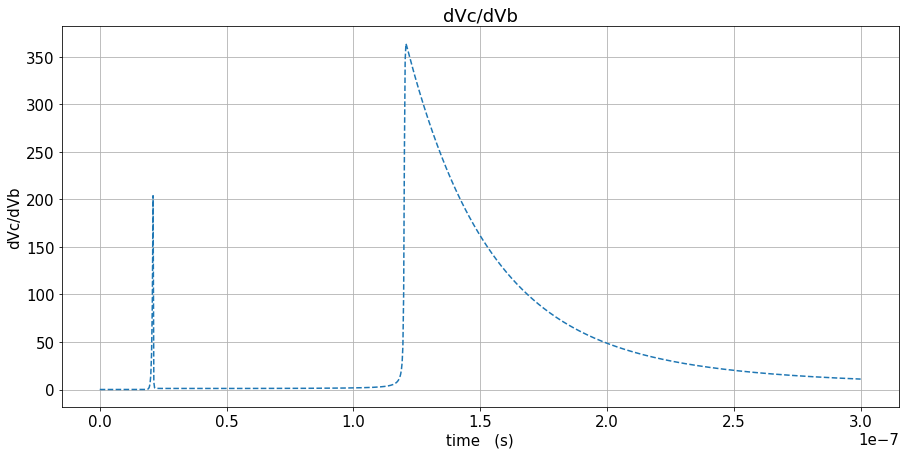

In [48]:
_dvcvb = np.array( [dVcdVb(_v) for _v in vb] )
plt.title('dVc/dVb')
plt.plot(t, _dvcvb, '--', color=color_vc)
plt.xlabel('time   (s)')
plt.ylabel('dVc/dVb')
plt.grid(True);

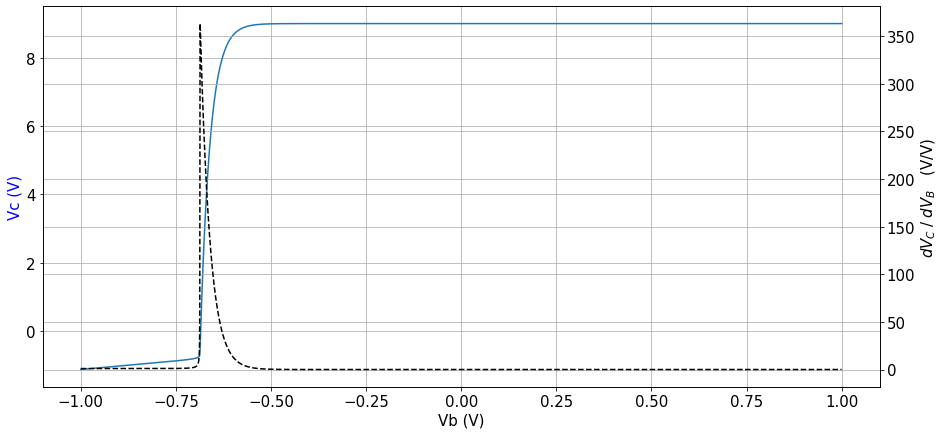

In [49]:
fig, ax1 = plt.subplots()
ax1.plot(v_base, v_coll)
ax1.set_xlabel('Vb (V)')
ax1.set_ylabel('Vc (V)', color='b')
ax1.grid()

ax2 = ax1.twinx()
ax2.plot(v_base,dVcdVb(v_base), 'k--')
ax2.set_ylabel('$dV_C\;/\;dV_B$   (V/V)', color='k')
ax2.grid()

plt.show();

In [50]:
def plot_current_Q1(r1, cutoff_time=None):
    iQ1 = 1000 * bjt['Beta'] * shockley(vs-va, bjt)
    iR1 = 1000 * va / r1
    if cutoff_time == None:
        cutoff_time,_,_ = calc_cutoff(iQ1)
    plt.plot(t, iQ1, color=color_iQ1, label='$i_{Q1}$')
    plt.plot(t,iR1, color=color_iR1, label='$i_{R1}$')
    plt.axvline(cutoff, c='k', ls='--')
    plt.ylabel('Collector current Q1 (mA)')
    plt.xlabel('time   (s)')
    plt.grid(True)
    plt.legend()
    plt.show()

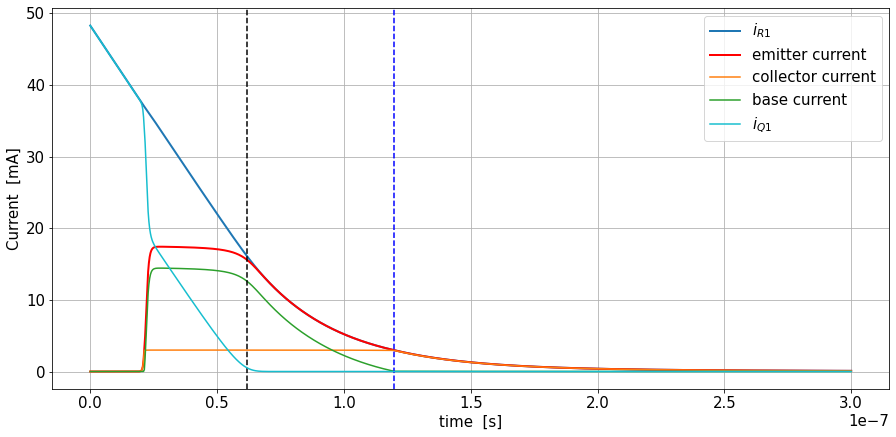

In [51]:
def plot_currents(_beta, _r1, cutoff_time=None):
    iR1 = 1000 * (va / _r1)
    iBJT = 1000 * (np.array( [i_vb(v) for v in vb] ))

    plt.plot(t, iR1, linewidth=2, label='$i_{R1}$')
    plt.plot(t, iBJT, 'r', linewidth=2, label='emitter current')

    coll = np.array( [vc_vb(v) for v in vb] )
    iR2 = 1000 * ((circuit['VCC'] - coll) / circuit['R2'])
    plt.plot(t, iR2, label='collector current')
    plt.plot(t, iBJT-iR2, label='base current')
    plt.axvline(cutoff, c='k', ls='--')
    if saturation > 0:
        plt.axvline(saturation, c='b', ls='--')

    _iQ1 = 1000 * bjt['Beta'] * shockley(vs-va, bjt)
    if cutoff_time is None:
        cutoff_time,_,_ = calc_cutoff(_iQ1)
    plt.plot(t, _iQ1, color=color_iQ1, label='$i_{Q1}$')

    plt.grid(True)
    plt.ylabel('Current  [mA]')
    plt.xlabel('time  [s]')
    plt.legend()
    
plot_currents(bjt['Beta'],circuit['R1'])

In [52]:
def interactive_model(t1, r1, c1):
    # Copy the global state variables to local copies ...
    _signal = signal.copy()
    _simulation = simulation.copy()
    _circuit = circuit.copy()
    _q = bjt.copy()

    # ... and then change local copies to the interactive values.
    _signal['T1'] = t1
    _circuit['R1'] = r1
    _circuit['C'] = c1

    # If only circuit variables have been changed the BJT model
    # does not have to be calculated again.
    calc_circuit(_signal, _circuit, _simulation, _q)

    return [t, va, vb, vc]

In [53]:
def plot_voltages(_q, t1, r1, c1):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    _r2 = circuit['R2']
    fig.suptitle(f'$R_1$={r1}Ω,  $R_2$={_r2}Ω,  $C_1$={c1/1e-12}pF,  $T_1$={t1/1e-6}µs', fontsize=24)

    ax1.set_xlabel('time   (s)')
    ax1.set_ylabel('Vs, Va, Vb, Vc   (V)')
    ax1.plot(t, va, label='Va', color='tab:red', linewidth=2)
    ax1.plot(t, vb, label='Vb', color='#ff7f0e', linewidth=2)
    ax1.plot(t, vc, label='Vc', color='tab:blue', linewidth=2)
    ax1.plot(t, vs, label='Vs', linewidth=2)
    ax1.axvline(cutoff, c='k', ls='--')
    if saturation > 0:
        ax1.axvline(saturation, c='r', ls='--')
    ax1.set_yticks(np.arange(-1,vc[0]+1,step=1))
    ax1.grid(True, linestyle='--')
    ax1.legend()
    
    ax2.plot(t, vb, color='#ff7f0e', label='Vb')
    ax2.plot(t, vc, color='tab:blue', label='Vc', linewidth=2)
    ax2.set_ylim([-0.7,0])
    ax2.axvline(cutoff, c='k', ls='--')
    if saturation > 0:
        ax2.axvline(saturation, c='r', ls='--')
    ax2.grid(True)
    ax2.legend()
    
    fig.tight_layout()
    plt.plot();
    if False:
        _file = f'plots/Plot-voltages t1={t1}, r1={r1}, c1={c1}.jpg'
        plt.savefig(_file)    

In [54]:
def plot_all(_q, t1, r1, c1):
    global cutoff_time
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=[15,11])
    
    _r2 = circuit['R2']
    _c1 = int(c1/1e-12)
    fig.suptitle(f'$R_1$={r1}Ω,  $R_2$={_r2}Ω,  $C_1$={_c1}pF,  $T_1$={t1/1e-6}µs', fontsize=24)
    
    # switch time from SI seconds to µs.
    _t = t / 1e-6
    _cutoff = cutoff / 1e-6
    _saturation = saturation / 1e-6
    
    # Voltages
    ax1.set_xlabel('time   (µs)')
    ax1.set_ylabel('$V_S, V_A, V_B, V_C$   (V)')
    ax1.plot(_t, va, label=r'$V_A$', color=color_va, linewidth=2)
    ax1.plot(_t, vb, label=r'$V_B$', color=color_vb, linewidth=2)
    ax1.plot(_t, vc, label=r'$V_C$', color=color_vc, linewidth=2)
    ax1.plot(_t, vs, label=r'$V_S$', color=color_vs, linewidth=2)
    ax1.axvline(_cutoff, c='k', ls='--')
    if _saturation>0:
        ax1.axvline(_saturation, c='k', ls='--')
    ax1.legend(loc='upper right')
    ax1.set_yticks(np.arange(-1,vc[0]+1,step=1))
    ax1.grid(True, linestyle='--')
    
    ax2.plot(_t, vb, color=color_vb, label='$V_B$')
    ax2.plot(_t, vc, color=color_vc, label='$V_C$', linewidth=2)
    ax2.set_ylim([-1,0])
    ax2.axvline(_cutoff, c='k', ls='--')
    if _saturation>0:
        ax2.axvline(_saturation, c='k', ls='--')
    ax2.set_xlabel('time   (µs)')
    ax2.grid(True)
    ax2.legend(loc='upper right')
    
    # Currents
    iR1 = 1000 * (va / r1)
    iBJT = 1000 * (np.array( [i_vb(v) for v in vb] ))
    ax3.plot(_t, iR1, color=color_iR1, linewidth=2, label=r'$i_{R_1}$')
    ax3.plot(_t, iBJT, color=color_iemitter, linewidth=2, label=r'$I_{Q_{2,E}}$')
    coll = np.array( [vc_vb(v) for v in vb] )
    iR2 = 1000 * ((circuit['VCC'] - coll) / circuit['R2'])
    ax3.plot(_t, iR2, color=color_icollector, label=r'$I_{R_2}$')
    ax3.plot(_t, iBJT-iR2, color=color_ibase, label=r'$I_{Q_{2,base}}$')
    _iQ1 = 1000 * bjt['Beta'] * shockley(vs-va, bjt)
    ax3.plot(_t, _iQ1, color=color_iQ1, label=r'$i_{Q_1}$')
    ax3.axvline(_cutoff, c='k', ls='--')
    if _saturation>0:
        ax3.axvline(_saturation, c='k', ls='--')
    ax3.grid(True)
    ax3.set_ylabel('Current  [mA]')
    ax3.set_xlabel('time   (µs)')
    ax3.legend(loc='upper right')

    ax4.plot(_t, va-vb, label='Capacitor voltage ($V_A-V_B$)')
    ax4.axvline(_cutoff, c='k', ls='--')
    if _saturation>0:
        ax4.axvline(_saturation, c='k', ls='--')
    ax4.set_xlabel('time   (µs)')
    ax4.grid(True)
    ax4.set_ylim(ymin=0)
    ax4.legend(loc='upper right')

    fig.tight_layout()
    plt.plot();
    
    if False:
        _file = f'plots/Plot-all t1={t1}, r1={r1}, c1={_c1}.jpg'
        plt.savefig(_file)

In [55]:
def plot_model(t1, r1, c1, plot):
    # First calculate the model through with the new settings
    t1 = t1 * 1e-6
    c1 = c1 * 1e-12
    interactive_model(t1, r1, c1)

    # then plot
    if plot == 'Voltages':
        plot_voltages(bjt['Beta'], t1, r1, c1)
    elif plot == 'Currents':
        plot_currents(bjt['Beta'],r1)
    elif plot == 'Q1 Current':
        plot_current_Q1(r1)
    elif plot == 'All':
        plot_all(bjt['Beta'], t1, r1, c1)

In [56]:
from ipywidgets import interactive, FloatSlider, IntSlider, Dropdown
calc_bjt(circuit, simulation, bjt)
fast = True
_c1 = circuit['C'] / 1e-12
_r1 = circuit['R1']
_t1 = signal['T1'] / 1e-6
interactive(plot_model,
            t1=FloatSlider(min=0.01, max=0.5, step=0.01, value=_t1, description='T1 (µs)'),
            r1=IntSlider(value=_r1, min=10, max=10000, step=55, description='$R_1 (Ω)$'),
            c1=IntSlider(value=_c1, min=10, max=3000, step=55, description='$C_1 (pF)$'),
            plot=['All', 'Voltages', 'Currents', 'Q1 Current'],
            continuous_update=False
           )


interactive(children=(FloatSlider(value=0.1, description='T1 (µs)', max=0.5, min=0.01, step=0.01), IntSlider(v…

In [57]:
_vt = -bjt['Vt']
_is = bjt['Is']
_beta = bjt['Beta']
_beta = 90
_c1 = circuit['C']
_v0 = signal['V0']
_t1 = signal['T1']
print(np.log(_v0 / _t1 * _c1 / _is / _beta + 1))
_vb = -_vt * np.log(_v0 / _t1 * _c1 / _is / _beta + 1)
print(_vb)

28.301695440636948
0.7358440814565607


In [58]:
def pulse_width(t, c):
    # pulse width is the time at which dd(c)/dt2 is maximal
    dcdt = np.gradient(c)
    ddcdt2 = np.gradient(dcdt)
    iw = np.argmax(ddcdt2)
    w = t[iw]
    return w

In [59]:
# calculate low pulse duration for various values of R1
if False:
    _r1 = np.linspace(10, 500, 25)
    _c1 = 1e-6
    _beta = 100
    _results = [calc_model(__r1, _c1) for __r1 in _r1]

    # list of list of np.array
    # [r][4]
    _w = []
    _i = 0

    # Todo: no need to keep all result in _results first.
    # Instead, calculate calc_model() in the loop and
    # calculate pulse-width from it immediately.
    for r1 in _r1:
        _t = _results[_i][0]
        _coll = _results[_i][3]   
        _w = _w + [pulse_width(_t, _coll)]
        _i = _i + 1

    plt.title(f'Pulse-width vs. R1   (C1={_c1}F, Beta={_beta})')
    plt.plot(_r1, _w)
    plt.xlabel('R1   (Ω)')
    plt.ylabel('Pulse-width  (s)')
    plt.grid(True);


In [60]:
# create a plot of Vb(t-cutoff) vs. R1.
import math

def vb_r1():
    
    def find_nearest(array, value):
        idx = np.searchsorted(array, value, side="left")
        if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
            return idx-1
        else:
            return idx
    
    step = 50
    r1_start = 10
    r1_end = 2000
    n = (r1_end - r1_start) / step + 1
    r1 = np.linspace(r1_start, r1_end, int(n))
    c1 = 190e-12
    t1 = 0.1e-6
    vbe = np.zeros(r1.size)
    vbmin = np.zeros(r1.size)
    
    for i in range(r1.size):
        r = r1[i]
        interactive_model(t1, r, c1)
#        vbe[i] = vb[find_nearest(t, cutoff)]
        vbmin[i] = vb[np.argmin(vb)]
        
#    plt.plot(r1, vbe, label='$V_b$')
    plt.plot(r1, vbmin, label='$V_{b,min}$')
    plt.xlabel('$R_1 (Ω)$')
    plt.ylabel('$V_{B_{min}}$')
    plt.legend()
    plt.show()
    return

if False:
    vb_r1()

In [61]:
def vb_r1c1():
    
    r1_step = 10
    r1_start = 10
    r1_end = 1000
    r1_n = (r1_end - r1_start) / r1_step + 1
    r1 = np.linspace(r1_start, r1_end, int(r1_n))
    
    # C1 in pF
    c1_step = 10
    c1_start = 10
    c1_end = 1000
    c1_n = (c1_end - c1_start) / c1_step + 1
    c1 = np.linspace(c1_start, c1_end, int(c1_n))
    
    R, C = np.meshgrid(r1,c1)
    t1 = 0.1e-6
    
    @np.vectorize
    def do(r, c):
        interactive_model(t1, r, c*1e-12)
        return vb[np.argmin(vb)]
 
    Z = do(R, C)
        
    fig, ax = plt.subplots(figsize=[10,7])
    CS = ax.contour(R, C, Z)
    ax.clabel(CS, inline=True, fontsize=10);
    plt.xlabel('$R_1 (Ω)$')
    plt.ylabel('$C_1 (pF)$')
    plt.grid()
    dVsdt = - signal['V0'] / t1 / 1e6
    plt.title(f'Minimal $V_B$ (V), with dVs/dt={int(dVsdt)}(V/µs)')

#    t1 = signal['T1'] / 1e-6
    if False:
        _file = f'plots/Plot-VB_RC.jpg'
        plt.savefig(_file)
    plt.show()
    return

if False:
    vb_r1c1()

In [62]:
# calculate pulsewidth
# returns the time between Vc crossing zero volts

def pulsewidth():
    zero = np.where(np.diff(np.signbit(vc)))[0]
    if zero.size != 2:
        return np.NaN
    return (zero[1] - zero[0]) * simulation['time_step']

if False:
    print(pulsewidth() / 1e-6)

In [63]:
def pulsewidth_r1c1():
    
    r1_step = 5
    r1_start = 10
    r1_end = 1000
    r1_n = (r1_end - r1_start) / r1_step + 1
    r1 = np.linspace(r1_start, r1_end, int(r1_n))
    
    # C1 in pF
    c1_step = 1
    c1_start = 10
    c1_end = 200
    c1_n = (c1_end - c1_start) / c1_step + 1
    c1 = np.linspace(c1_start, c1_end, int(c1_n))
    
    R, C = np.meshgrid(r1,c1)
    t1 = 0.1e-6
    
    @np.vectorize
    def do(r, c):
        interactive_model(t1, r, c*1e-12)
        return pulsewidth() / 1e-6
 
    Z = do(R, C)
        
    fig, ax = plt.subplots(figsize=[10,7])
    CS = ax.contour(R, C, Z, 15)
    ax.clabel(CS, inline=True, fontsize=10);
    plt.xlabel('$R_1 (Ω)$')
    plt.ylabel('$C_1 (pF)$')
    plt.grid()
    plt.title('Pulse width (µs) as function of R1 and C1')
    
    t1 = signal['T1'] / 1e-6
    if False:
        _file = f'plots/Plot-PW_RC t1={t1}.jpg'
        plt.savefig(_file)
    plt.show()


    return

if False:
    pulsewidth_r1c1()

In [64]:
import pandas as pd

if False:
    df = pd.read_csv (r'simple detector.txt', sep='\t')
    _t = df['time'] / 1e-6
    _v = df['V(e5)']
    plt.figure(figsize=[12,7])
    lw = 2
    plt.plot(_t,_v, 'k', label='LTSpice', linewidth=lw)
    plt.plot(t/1e-6, vb, 'k:', label='Python', linewidth=lw)
    #plt.plot(t/1e-6, vs, label='signal')
    plt.xlabel('time   (µs)')
    plt.ylabel('$V_B$   (V)')
    plt.ylim([-1,0])
    plt.grid()
    plt.legend()

    np.save('time', t/1e-6)
    np.save('b', vb)
    np.save('c', vc)

    _file = f'plots/ltspice vs. python.jpg'
    plt.savefig(_file, bbox_inches='tight')

    plt.show();


# Next cell creates a publication ready plot

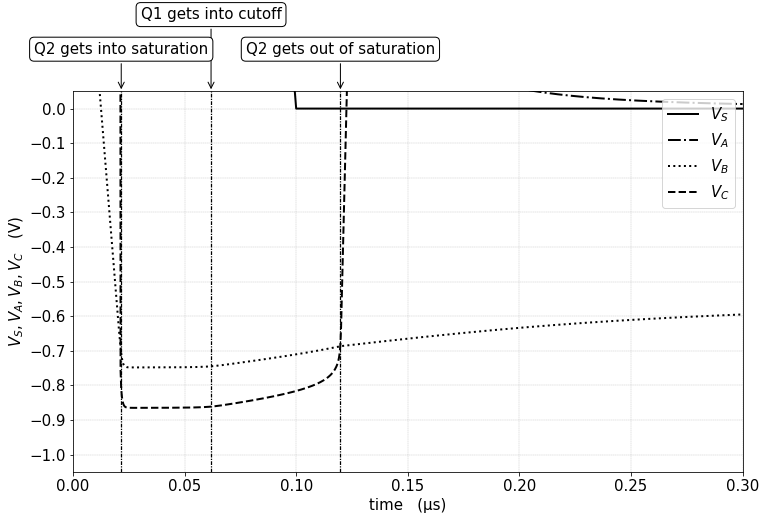

In [65]:
# switch time from SI seconds to µs.
_t = t / 1e-6
_cutoff = cutoff / 1e-6
_saturation = saturation / 1e-6

bbox = {'boxstyle':'round', 'fc': 'white'}

enter = calc_Q2_enters_saturation()[0] / 1e-6

plt.figure(figsize=[12,7])

# Set the min max times
tmin = 0
tmax = t[-1] / 1e-6
plt.xlim([tmin,tmax]) # When setting limits to the axis, matplotlib sets it exactly

# Set the min max voltages
vstep = 0.1
vmin = -1
vmax = 0
#vstep = 1
#vmin = -1
#vmax = 9
plt.ylim(vmin-vstep/2,vmax+vstep/2)

# Get the axis of this plot. We need this to find
# the top of the plot for the annotations arrows.
ax = plt.gca()
top = ax.get_ylim()[1]

plt.xlabel('time   (µs)')
plt.ylabel('$V_S, V_A, V_B, V_C$   (V)')
lw = 2
plt.plot(_t, vs, 'k', label=r'$V_S$', linestyle='-', linewidth=lw)
plt.plot(_t, va, 'k', label=r'$V_A$', linestyle='-.', linewidth=lw)
plt.plot(_t, vb, 'k', label=r'$V_B$', linestyle=':', linewidth=lw)
plt.plot(_t, vc, 'k', label=r'$V_C$', linestyle='--', linewidth=lw)

# if Q1 gets into cutoff, draw a vertical line at the
# time at which it gets into cutoff. Also annotate it.
if True:
    plt.axvline(_cutoff, c='k', linestyle=(0,(3,1,1,1)), linewidth=1.25)
    plt.annotate('Q1 gets into cutoff', 
                 xy=(_cutoff,top), 
                 xytext=(_cutoff,top+2*vstep), 
                 arrowprops=dict( arrowstyle="->", connectionstyle="arc3" ),
                 annotation_clip=False,
                 ha='center', va='bottom', bbox= bbox
                 )

# if Q2 gets into saturation, draw vertical lines
# at which at it gets into saturation and leaves saturation.
# Also annotate these times.
if _saturation>0:
    plt.axvline(enter, c='k', linestyle=(0,(3,1,1,1)), linewidth=1.25)
    plt.annotate('Q2 gets into saturation', 
                 xy=(enter,top), 
                 xytext=(enter,top+vstep),
                 arrowprops=dict( arrowstyle="->", connectionstyle="arc3" ),
                 ha='center', va='bottom', bbox= bbox
                 )
    
    plt.axvline(_saturation, c='k', linestyle=(0,(3,1,1,1)), linewidth=1.25)
    plt.annotate('Q2 gets out of saturation',
                 xy=(_saturation,top),
                 xytext=(_saturation,top+vstep), 
                 arrowprops=dict( arrowstyle="->", connectionstyle="arc3" ),
                 ha='center', va='bottom', bbox= bbox
                )
    
plt.legend(loc='upper right')

# place y-ticks at every vstep
plt.yticks(np.arange(vmin,vmax+vstep,step=vstep))
# plt.yticks(np.arange(-1,10,step=1))

# grid settings
plt.grid(True, linestyle='--', lw=0.35)

if False:
    _file = f'plots/pubready.jpg'
    plt.savefig(_file, bbox_inches='tight')
    # if bbox_inches='tight' is not included, the saved file will miss some of the annotations.

plt.show();